> Reference: https://www.geeksforgeeks.org/stock-price-prediction-using-machine-learning-in-python/

In [41]:
%pip install pandas -q
%pip install numpy -q
%pip install seaborn  -q
%pip install matplotlib -q
%pip install yfinance -q
%pip install scikit-learn -q
%pip install yellowbrick


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgr

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

# Load dataset of bank stock price

In [3]:
ticker = "ITUB4.SA"
data = yf.download(ticker, start="2008-01-01", progress=False)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,15.100806,15.223335,14.306027,14.411997,8.390958,6442543
2008-01-03,14.372258,14.736532,14.117267,14.140448,8.232860,7212266
2008-01-04,14.315962,14.431867,13.799355,14.239795,8.290697,7374122
2008-01-07,14.292780,14.570953,14.007985,14.239795,8.290697,7597580
2008-01-08,14.534526,14.703416,14.256353,14.372258,8.367819,5372057


# Data analysis

### Visualize dataset info

In [5]:
data.shape

(3876, 6)

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3.876000e+03
mean,21.517539,21.799286,21.222586,21.512633,16.731696,2.267386e+07
std,7.123009,7.186481,7.053429,7.115916,7.935137,1.393839e+07
min,7.244082,7.653890,6.999853,7.244082,4.217649,0.000000e+00
25%,15.766475,15.967374,15.577260,15.775082,9.843326,1.333177e+07
50%,19.382919,19.682645,19.144298,19.423195,13.558575,1.949876e+07
75%,26.915833,27.295000,26.580000,26.912500,24.145989,2.864823e+07
max,38.669998,39.790001,38.400002,39.689999,33.508636,1.606699e+08


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3876 entries, 2008-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3876 non-null   float64
 1   High       3876 non-null   float64
 2   Low        3876 non-null   float64
 3   Close      3876 non-null   float64
 4   Adj Close  3876 non-null   float64
 5   Volume     3876 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 212.0 KB


# Exploratory Data Analysis

Now let's look at how quarterly results can affect stock prices over time.

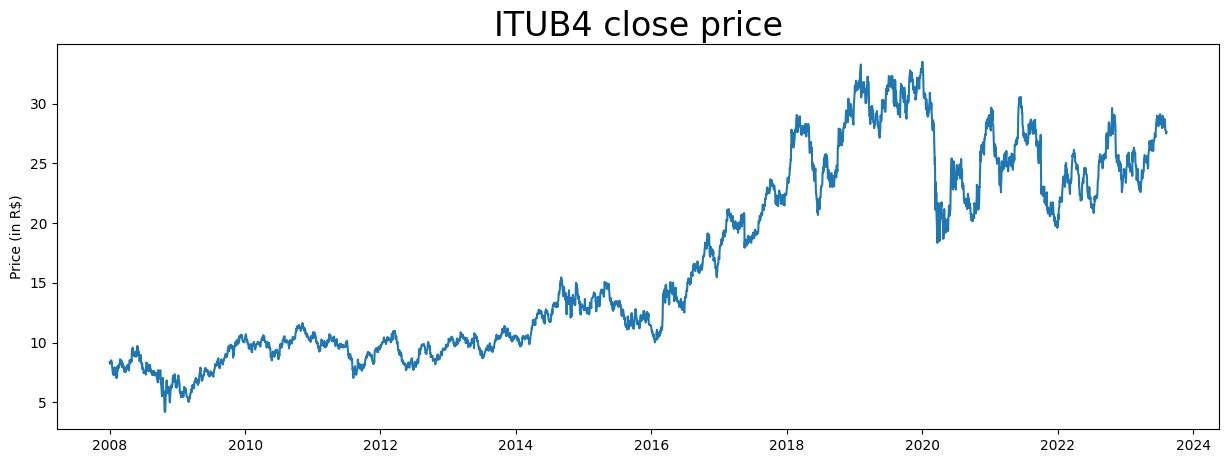

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(data["Adj Close"])
plt.title("ITUB4 close price", fontsize=24)
plt.ylabel("Price (in R$)")
plt.show()

Let"s check if the "Close" and "Adj Close" have the same values, so that we can remove possibly redundant data.

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,15.100806,15.223335,14.306027,14.411997,8.390958,6442543
2008-01-03,14.372258,14.736532,14.117267,14.140448,8.232860,7212266
2008-01-04,14.315962,14.431867,13.799355,14.239795,8.290697,7374122
2008-01-07,14.292780,14.570953,14.007985,14.239795,8.290697,7597580
2008-01-08,14.534526,14.703416,14.256353,14.372258,8.367819,5372057
...,...,...,...,...,...,...
2023-08-07,27.930000,28.280001,27.620001,27.660000,27.660000,33001900
2023-08-08,27.360001,28.010000,27.110001,27.600000,27.600000,44517500
2023-08-09,27.500000,27.600000,26.920000,27.500000,27.500000,35060900


In [10]:
data[data["Close"] == data["Adj Close"]].shape

(9, 6)

As we can notice, only 8 rows the "Close" and "Adj Close" have the same value, so we can't remove it.

Before moving on, let's check the dataset for null values.

In [11]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

/tmp/ipykernel_22901/980192968.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)


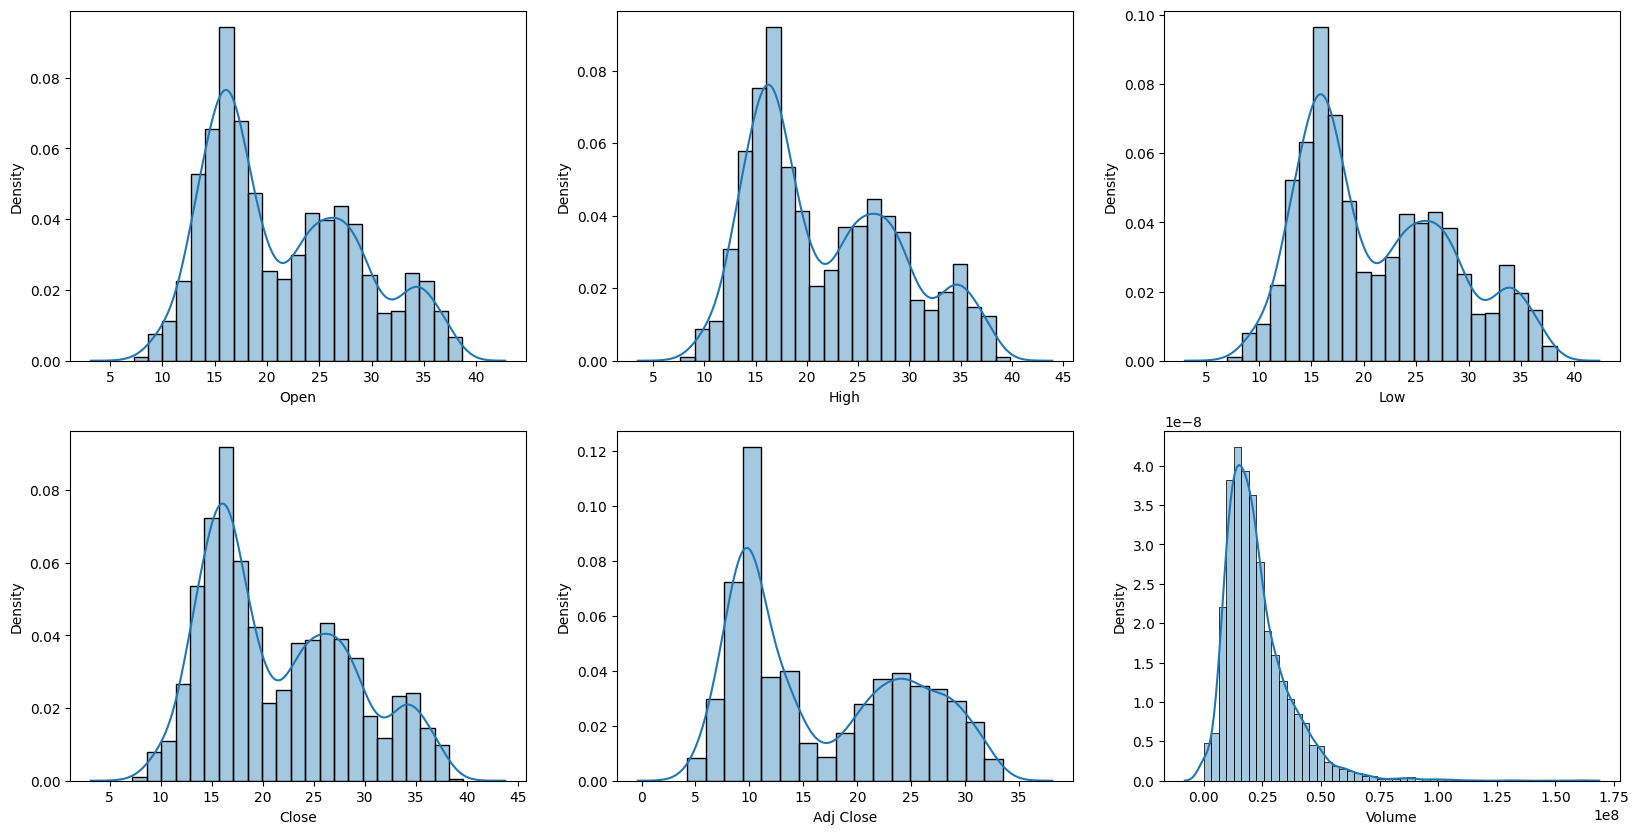

In [12]:

features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

plt.subplots(figsize=(20, 10))

for i, column in enumerate(features):
    plt.subplot(2, 3, i+1)

    # https://stackoverflow.com/questions/67638590/emulating-deprecated-seaborn-distplots
    _, FD_bins = np.histogram(data[column], bins="fd")
    bin_nr = min(len(FD_bins)-1, 50)
    sns.histplot(data=data, x=column, bins=bin_nr,
                 stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})

plt.show()

After that, let's create the box plot to identify outliers.

/tmp/ipykernel_22901/2157267840.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


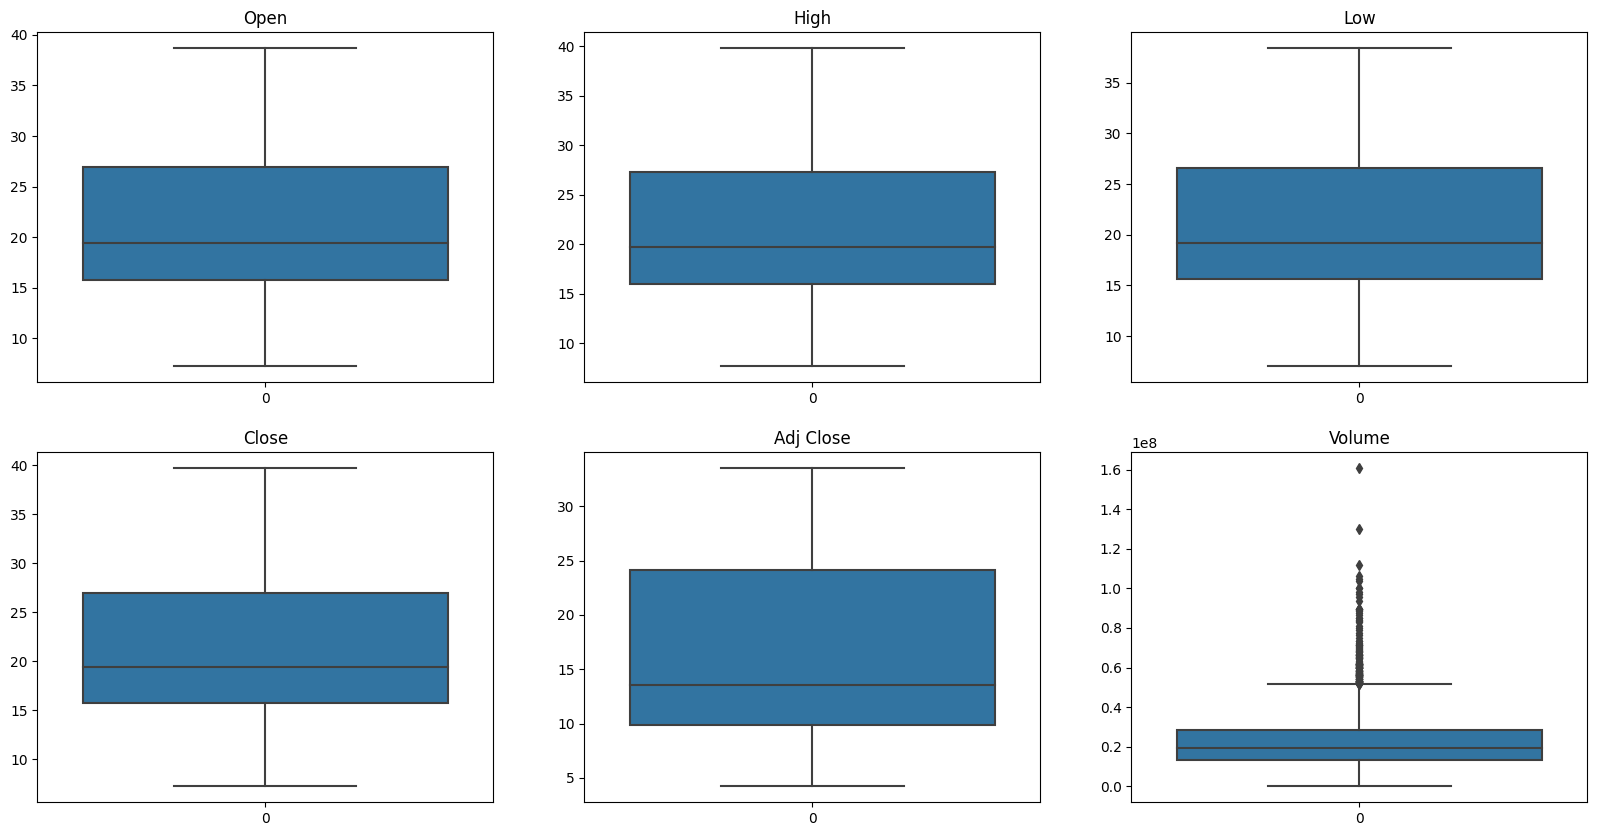

In [13]:
plt.subplots(figsize=(20,10))

for i, column in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(data[column]).set_title(column)

plt.show()

We can conclude that only in the volume column have outliers.

# Feature Engineering

Let's add 3 new columns "day", "month" and "year" from column "Date".

In [18]:
data['day'] = data.index.day.astype('int')
data['month'] = data.index.month.astype('int')
data['year'] = data.index.year.astype('int')
 
data.head()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
Date,,,,,,,,,
2008-01-02,15.100806,15.223335,14.306027,14.411997,8.390958,6442543,2,1,2008
2008-01-03,14.372258,14.736532,14.117267,14.140448,8.232860,7212266,3,1,2008
2008-01-04,14.315962,14.431867,13.799355,14.239795,8.290697,7374122,4,1,2008
2008-01-07,14.292780,14.570953,14.007985,14.239795,8.290697,7597580,7,1,2008
2008-01-08,14.534526,14.703416,14.256353,14.372258,8.367819,5372057,8,1,2008


Now we create an `is_quarter` column to use later in the algorithm because every quarter the companies publish the quarterly results.

In [25]:
data['is_quarter_end'] = np.where(data['month'] % 3 == 0, 1, 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
Date,,,,,,,,,,
2008-01-02,15.100806,15.223335,14.306027,14.411997,8.390958,6442543,2,1,2008,0
2008-01-03,14.372258,14.736532,14.117267,14.140448,8.232860,7212266,3,1,2008,0
2008-01-04,14.315962,14.431867,13.799355,14.239795,8.290697,7374122,4,1,2008,0
2008-01-07,14.292780,14.570953,14.007985,14.239795,8.290697,7597580,7,1,2008,0
2008-01-08,14.534526,14.703416,14.256353,14.372258,8.367819,5372057,8,1,2008,0


/tmp/ipykernel_22901/1494818884.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


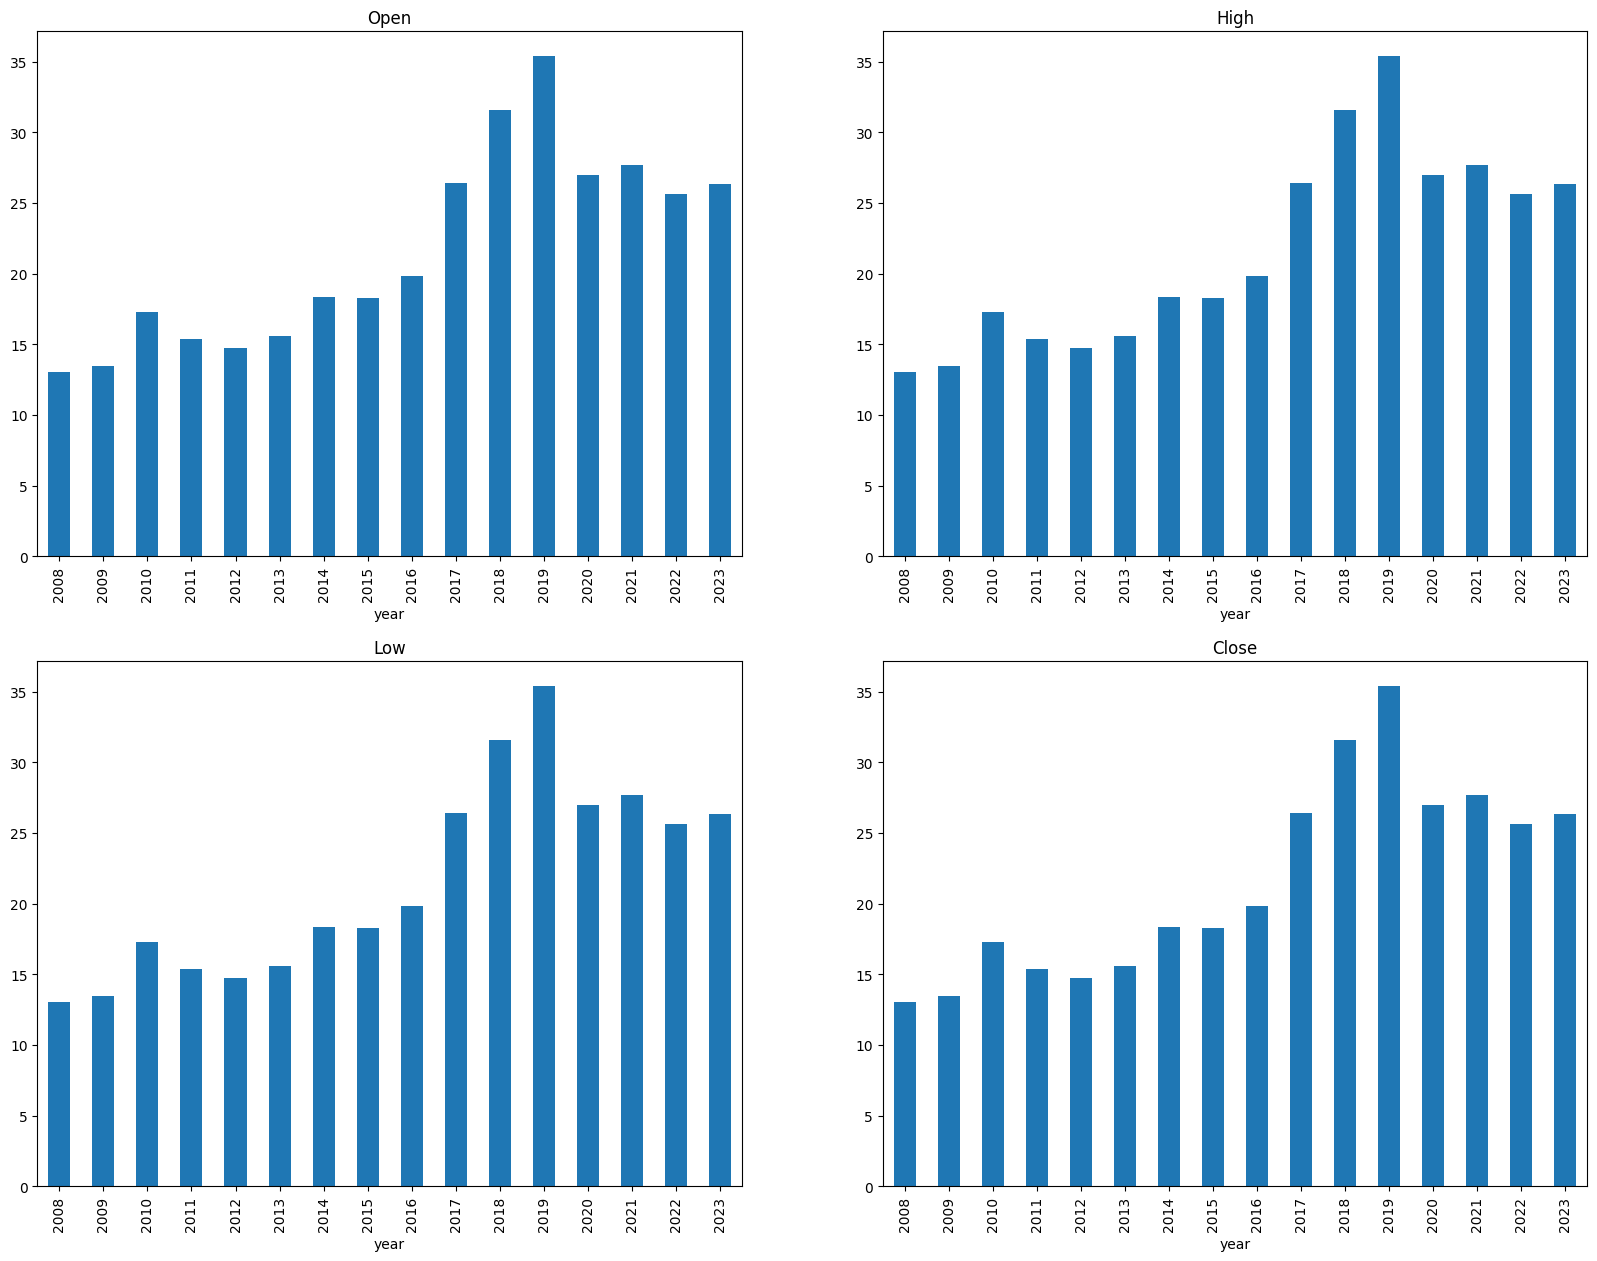

In [29]:
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,15))
 
for i, column in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar().set_title(column)

plt.show()

In [31]:
data.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,21.562839,21.844573,21.272231,21.561341,16.760581,2.262913e+07,15.810131,5.978732,2015.344934
1,21.426729,21.708502,21.123064,21.414992,16.673791,2.276353e+07,15.598450,7.327907,2015.277519


With the above DataFrame we can make some importante observations:

- The price ("Adj Close") is slightly lower when it is at the end of a quarter

- The volume has a small increase at the end of a quarter

In [32]:
data['open-close']  = data['Open'] - data['Adj Close']
data['low-high']  = data['Low'] - data['High']
data['target'] = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, 0) # "1" if the "Adj Close" of the previous day is higher than the current "Adj Close"

The "target" is the most importante feature, because it will be used to help model to buy or not.

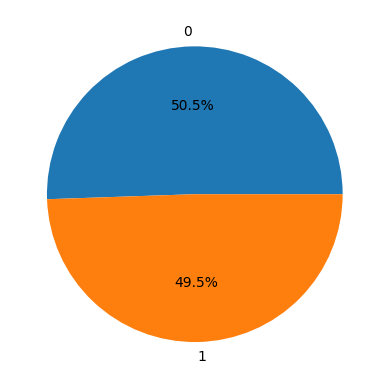

In [33]:
plt.pie(
  data['target'].value_counts().values,
  labels=[0, 1], 
  autopct='%1.1f%%'
)
plt.show()

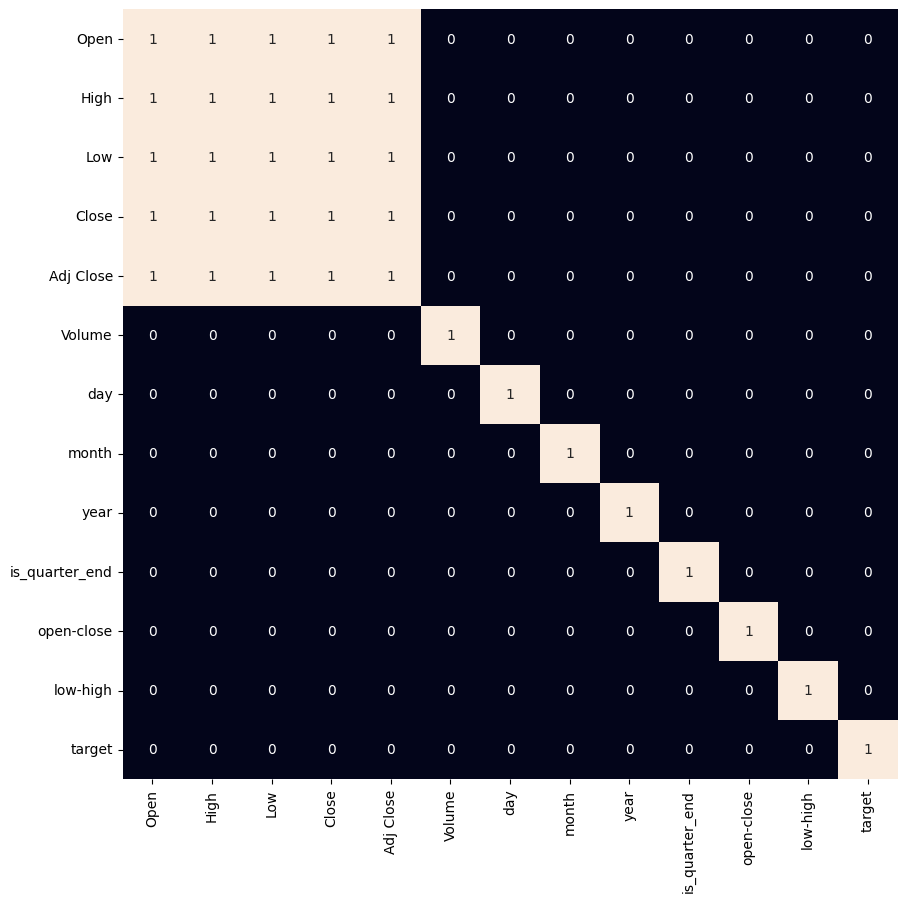

In [35]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

# Data Splitting and Normalization

In [94]:
features = data[['open-close', 'low-high', 'is_quarter_end']]
target = data['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.1, random_state=2022
)

X_train.shape, X_test.shape

((3488, 3), (388, 3))

# Model Development and Evaluation

In [116]:
model = SVC(kernel='sigmoid', C=1, probability=True)
 
model.fit(X_train, y_train)
 
predicts = model.predict(X_test)

0.5180412371134021

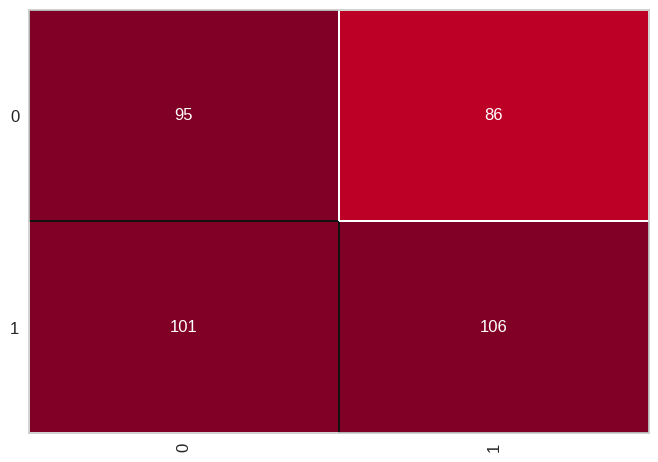

In [117]:
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [118]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       181
           1       0.55      0.51      0.53       207

    accuracy                           0.52       388
   macro avg       0.52      0.52      0.52       388
weighted avg       0.52      0.52      0.52       388



In [119]:
accuracy_score(Y_valid, predicts)

0.5180412371134021